In [1]:
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt

In [11]:
uniprot_df = pd.read_table('/Users/cgu3/Documents/Grape-Pi/data/miscellaneous/uniprotkb_proteome_UP000005640_AND_revi_2023_10_05.tsv', sep='\t')
uniprot_df = uniprot_df[['STRING', 'Entry']]
uniprot_df.dropna(subset=['STRING'], inplace=True)
uniprot_df['STRING'] = uniprot_df['STRING'].str.replace(';', '')
uniprot_df

,STRING,Entry
2,9606.ENSP00000482829,A0A0B4J2F2
7,9606.ENSP00000377112,A0AV02
8,9606.ENSP00000371212,A0AV96
9,9606.ENSP00000419279,A0AVF1
10,9606.ENSP00000372394,A0AVI4
...,...,...
20371,9606.ENSP00000429608,Q96PS1
20373,9606.ENSP00000402355,Q96T59
20383,9606.ENSP00000359558,Q9H1L0
20388,9606.ENSP00000455079,Q9H693


In [12]:
string_df = pd.read_table('/Users/cgu3/Documents/Grape-Pi/data/miscellaneous/9606.protein.links.detailed.v12.0.txt', sep=' ')
string_df

,protein1,protein2,neighborhood,fusion,cooccurence,coexpression,experimental,database,textmining,combined_score
0,9606.ENSP00000000233,9606.ENSP00000356607,0,0,0,45,134,0,81,173
1,9606.ENSP00000000233,9606.ENSP00000427567,0,0,0,0,128,0,70,154
2,9606.ENSP00000000233,9606.ENSP00000253413,0,0,0,118,49,0,69,151
3,9606.ENSP00000000233,9606.ENSP00000493357,0,0,0,56,53,0,457,471
4,9606.ENSP00000000233,9606.ENSP00000324127,0,0,0,0,46,0,197,201
...,...,...,...,...,...,...,...,...,...,...
13715399,9606.ENSP00000501317,9606.ENSP00000475489,0,0,0,60,99,0,126,195
13715400,9606.ENSP00000501317,9606.ENSP00000370447,0,0,0,55,111,0,79,158
13715401,9606.ENSP00000501317,9606.ENSP00000312272,0,0,0,0,0,0,227,226
13715402,9606.ENSP00000501317,9606.ENSP00000402092,0,0,0,0,67,0,146,169


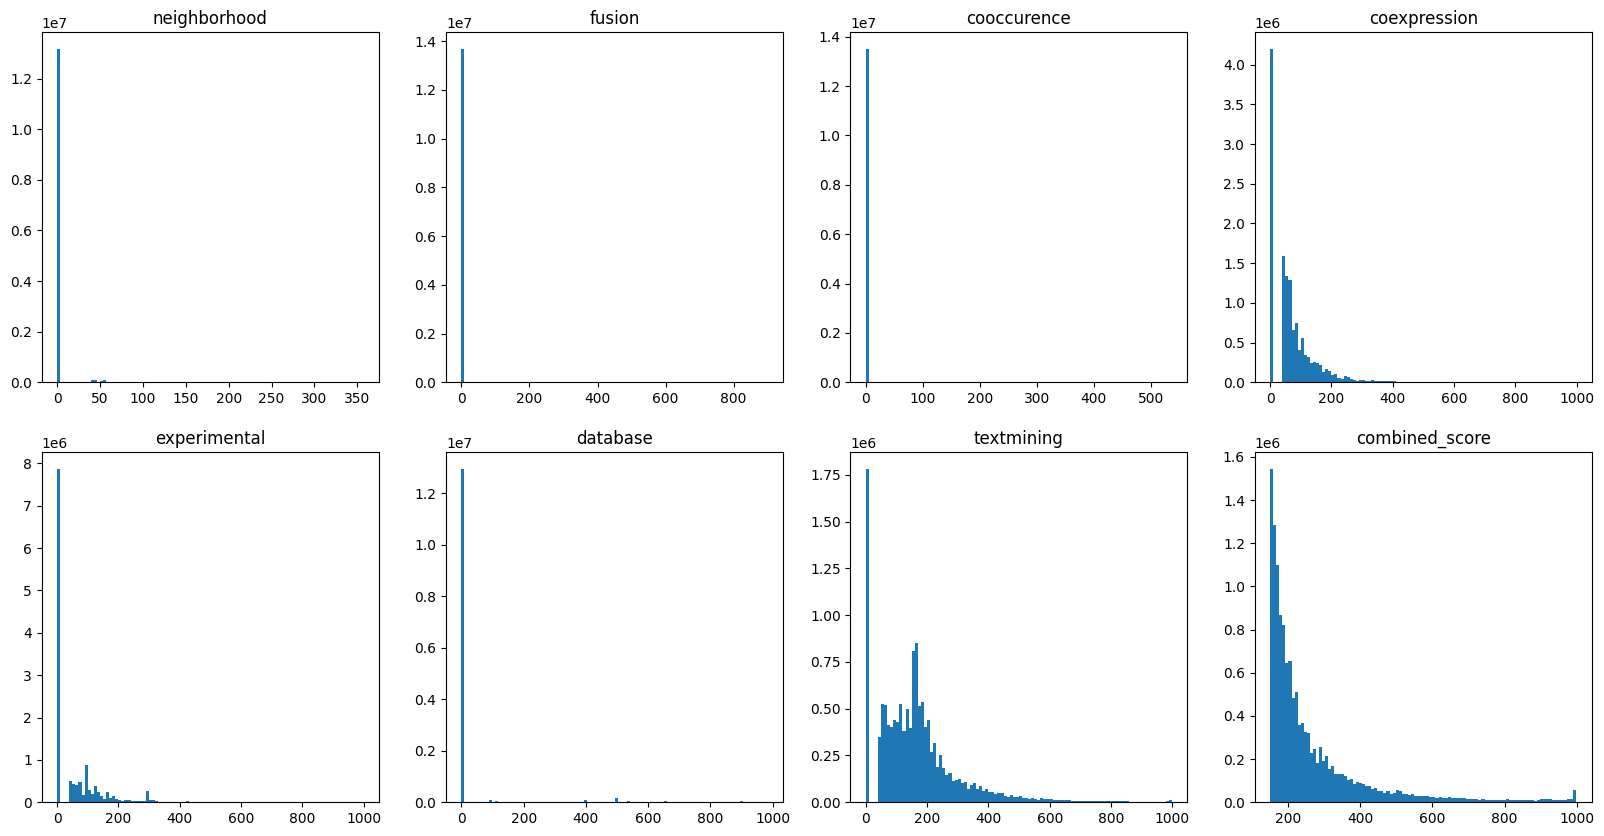

In [13]:
# check score distribution from different sources
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
ax[0, 0].hist(string_df['neighborhood'], bins=100)
ax[0, 0].set_title('neighborhood')

ax[0, 1].hist(string_df['fusion'], bins=100)
ax[0, 1].set_title('fusion')

ax[0, 2].hist(string_df['cooccurence'], bins=100)
ax[0, 2].set_title('cooccurence')

ax[0, 3].hist(string_df['coexpression'], bins=100)
ax[0, 3].set_title('coexpression')

ax[1, 0].hist(string_df['experimental'], bins=100)
ax[1, 0].set_title('experimental')

ax[1, 1].hist(string_df['database'], bins=100)
ax[1, 1].set_title('database')

ax[1, 2].hist(string_df['textmining'], bins=100)
ax[1, 2].set_title('textmining')

ax[1, 3].hist(string_df['combined_score'], bins=100)
ax[1, 3].set_title('combined_score');

In [14]:
def get_values_from_dict(keys, dictionary, na_rm=True):
    # Ensure the dictionary is a DataFrame
    dictionary = pd.DataFrame(dictionary)
    
    # Check for duplicated keys in the dictionary
    if dictionary.iloc[:, 0].duplicated().any():
        raise ValueError("Non-unique keys in dictionary: the same key can be mapped to multiple values")
    
    # Convert keys to a DataFrame
    keys_df = pd.DataFrame({'key': keys})
    
    # Join keys with the dictionary to get the corresponding values
    merged = keys_df.merge(dictionary, left_on='key', right_on=dictionary.columns[0], how='left')
    
    # Select the values column
    values = merged[dictionary.columns[1]]
    
    # If na_rm is True, remove NA values
    if na_rm:
        values = values.dropna()
    
    return values.tolist()

In [15]:
protein1 = get_values_from_dict(string_df['protein1'], uniprot_df, na_rm=False)
protein2 = get_values_from_dict(string_df['protein2'], uniprot_df, na_rm=False)
'NA' in protein1
'NA' in protein2

False

False

In [16]:
string_df['protein1'] = protein1
string_df['protein2'] = protein2
string_df.dropna(inplace=True)

In [17]:
string_df

,protein1,protein2,neighborhood,fusion,cooccurence,coexpression,experimental,database,textmining,combined_score
0,P84085,Q86X27,0,0,0,45,134,0,81,173
1,P84085,Q9C0D6,0,0,0,0,128,0,70,154
2,P84085,P36543,0,0,0,118,49,0,69,151
4,P84085,Q9NYI0,0,0,0,0,46,0,197,201
5,P84085,Q8N5M4,0,0,0,94,125,0,50,180
...,...,...,...,...,...,...,...,...,...,...
13175330,A0A096LPK9,P25098,0,0,0,0,97,650,42,670
13175331,A0A096LPK9,P22612,0,0,0,0,0,650,42,650
13175332,A0A096LPK9,P49407,0,0,0,0,108,650,56,679
13175333,A0A096LPK9,Q5JWF2,0,0,0,0,142,0,54,153


In [18]:
string_df.to_csv('/Users/cgu3/Documents/Grape-Pi/data/miscellaneous/9606.protein.links.v12.0-translated.csv', index=False)

In [21]:
string_df[string_df['combined_score'] < 200].to_csv('/Users/cgu3/Documents/Grape-Pi/data/miscellaneous/9606.protein.links.v12.0-translated-below-200.csv', index=False)

In [34]:
# try only coexpression score > 0
string_coexp_df = string_df.loc[string_df['coexpression'] > 0, ['protein1', 'protein2', 'coexpression']]
string_coexp_df
string_coexp_df.to_csv('/Users/cgu3/Documents/Grape-Pi/data/miscellaneous/9606.protein.links.detailed.v12.0-coexpression.csv', index=False)

,protein1,protein2,coexpression
0,P84085,Q86X27,45
2,P84085,P36543,118
5,P84085,Q8N5M4,94
6,P84085,P14672,55
8,P84085,Q96I51,56
...,...,...,...
13175147,P98088,O00548,56
13175151,P98088,P12830,67
13175153,P98088,Q12864,74
13175154,P98088,P37088,67


In [22]:
string_df['combined_score'].min()
string_df['combined_score'].max()

150

999

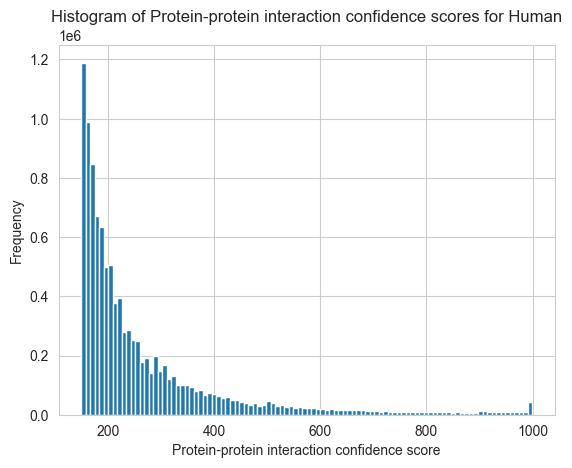

In [23]:
from matplotlib import pyplot as plt
plt.hist(string_df['combined_score'], bins=100)
plt.xlabel('Protein-protein interaction confidence score')
plt.ylabel('Frequency')
plt.title('Histogram of Protein-protein interaction confidence scores for Human')
plt.grid(True);

In [10]:
string_df[string_df['combined_score'] >= 400].to_csv('/Users/cgu3/Documents/Grape-Pi/data/miscellaneous/9606.protein.links.v12.0-translated-filtered.csv', index=False)

# Check PPI score for yeast

In [13]:
yeast_PPI = pd.read_csv('/Users/cgu3/Documents/Grape-Pi/data/yeast-ORBI/raw/interaction/yeast_interaction.csv')

<Axes: >

Text(0.5, 0, 'Protein-protein interaction confidence score')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Histogram of Protein-protein interaction confidence scores for Yeast')

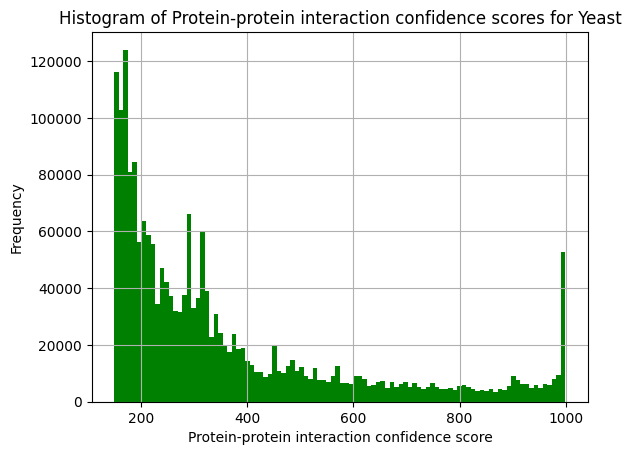

In [22]:
yeast_PPI['combined_score'].hist(bins=100, color='green')
plt.xlabel('Protein-protein interaction confidence score')
plt.ylabel('Frequency')
plt.title('Histogram of Protein-protein interaction confidence scores for Yeast')
plt.grid(True)